In [1]:
from pulser import Pulse
from pulser.waveforms import BlackmanWaveform
import numpy as np
import matplotlib.pyplot as plt
from pulser import DigitalAnalogDevice, Register, Sequence
from pulser_simulation import QutipEmulator

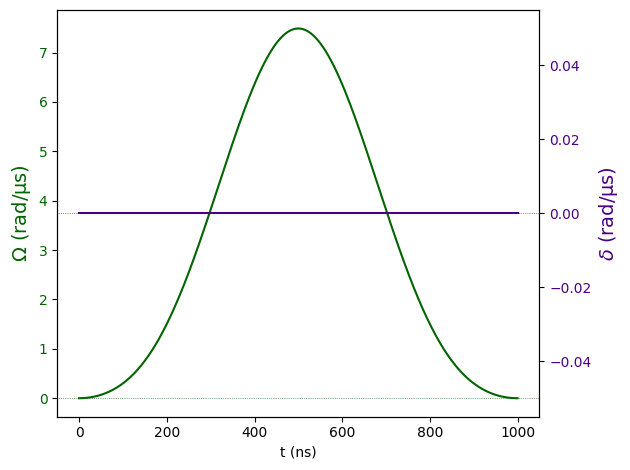

In [16]:
amp_wf = BlackmanWaveform(duration=1000, area=np.pi)
pi_pulse = Pulse.ConstantDetuning(amplitude=amp_wf, detuning=0.0, phase=0.0)

pi_pulse.draw()

In [17]:
data_rr = []
data_rg = []
data_gr = []
data_gg = []
distances = np.linspace(6.5, 14, 7)

r = [1, 0]  # |r>, |g> = [0, 1]. In pulser we use the convention that [1, 0] is the excited state
g = [0, 1]
rr = np.kron(r, r)  # |rr>
rg = np.kron(r, g)  # |rg>
gr = np.kron(g, r)  # |gr>
gg = np.kron(g, g)  # |gg>
occup_rr = [np.outer(rr, np.conj(rr))]  # |rr><rr|
occup_rg = [np.outer(rg, np.conj(rg))]  # |rg><rg|
occup_gr = [np.outer(gr, np.conj(gr))]  # |gr><gr|
occup_gg = [np.outer(gg, np.conj(gg))]  # |gg><gg|

for i, R in enumerate(distances):
  reg = Register.rectangle(1, 2, spacing=R, prefix="atom")

  # Pulse Sequence
  seq = Sequence(reg, DigitalAnalogDevice)
  seq.declare_channel("ryd", "rydberg_local", "atom0")
  seq.declare_channel("global", "rydberg_global")
  seq.add(pi_pulse, "global") #, protocol="no-delay")
  # seq.add(pi_pulse, "ryd")
  # seq.target("atom1", "ryd")
  # seq.add(pi_pulse, "ryd")
  # seq.add(pi_pulse, "global", protocol="no-delay")

  sim = QutipEmulator.from_sequence(seq)

  res = sim.run() # Returns a SimulationResults instance
  data_rr.append(
    res.expect(occup_rr)[0]
  ) # Get expectation value for the occupation operator

  data_rg.append(
    res.expect(occup_rg)[0]
  ) # Get expectation value for the occupation operator |rg>
  
  data_gr.append(
    res.expect(occup_gr)[0]
  ) # Get expectation value for the occupation operator |gr>
  data_gg.append(
    res.expect(occup_gg)[0]
  ) # Get expectation value for the occupation operator |gg>
print("...Simulation Complete!")

...Simulation Complete!


...Simulation Complete!


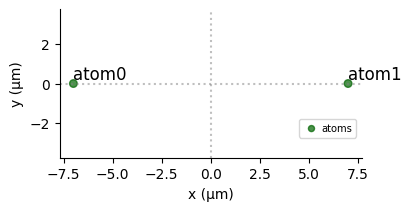

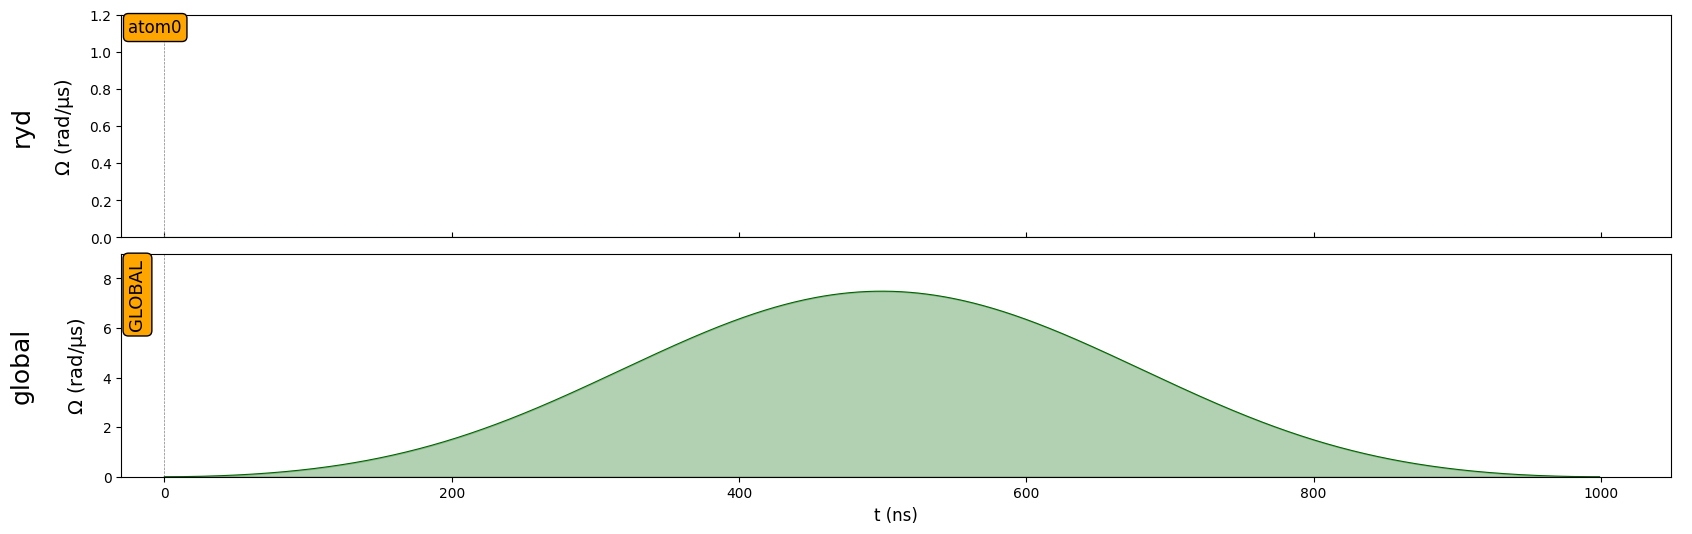

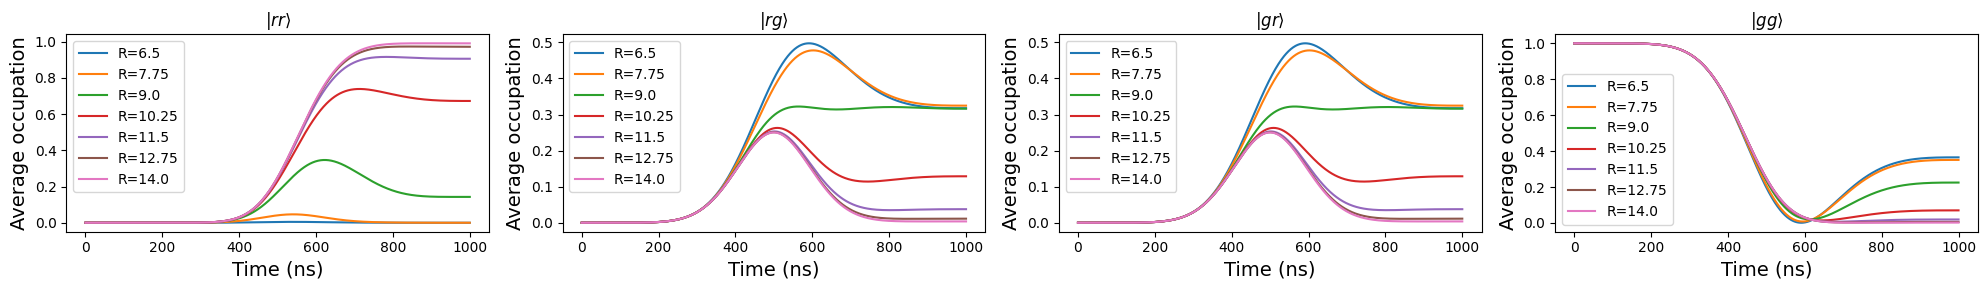

In [22]:
data_rr = []
data_rg = []
data_gr = []
data_gg = []
distances = np.linspace(6.5, 14, 7)

r = [1, 0]  # |r>, |g> = [0, 1]. In pulser we use the convention that [1, 0] is the excited state
g = [0, 1]
rr = np.kron(r, r)  # |rr>
rg = np.kron(r, g)  # |rg>
gr = np.kron(g, r)  # |gr>
gg = np.kron(g, g)  # |gg>
occup_rr = [np.outer(rr, np.conj(rr))]  # |rr><rr|
occup_rg = [np.outer(rg, np.conj(rg))]  # |rg><rg|
occup_gr = [np.outer(gr, np.conj(gr))]  # |gr><gr|
occup_gg = [np.outer(gg, np.conj(gg))]  # |gg><gg|

for i, R in enumerate(distances):
  reg = Register.rectangle(1, 2, spacing=R, prefix="atom")

  # Pulse Sequence
  seq = Sequence(reg, DigitalAnalogDevice)
  seq.declare_channel("ryd", "rydberg_local", "atom0")
  seq.declare_channel("global", "rydberg_global")
  seq.add(pi_pulse, "global") #, protocol="no-delay")
  # seq.add(pi_pulse, "ryd")
  # seq.target("atom1", "ryd")
  # seq.add(pi_pulse, "ryd")
  # seq.add(pi_pulse, "global", protocol="no-delay")

  sim = QutipEmulator.from_sequence(seq)

  res = sim.run() # Returns a SimulationResults instance
  data_rr.append(
    res.expect(occup_rr)[0]
  ) # Get expectation value for the occupation operator

  data_rg.append(
    res.expect(occup_rg)[0]
  ) # Get expectation value for the occupation operator |rg>
  
  data_gr.append(
    res.expect(occup_gr)[0]
  ) # Get expectation value for the occupation operator |gr>
  data_gg.append(
    res.expect(occup_gg)[0]
  ) # Get expectation value for the occupation operator |gg>
print("...Simulation Complete!")

reg.draw()
seq.draw()

fig, ax = plt.subplots(1, 4, figsize=(20, 3))
plt.sca(ax[0])
for i, R in enumerate(distances):
  plt.plot(data_rr[i], label=f"R={R}")
  plt.xlabel("Time (ns)", fontsize=14)
  plt.ylabel(r"Average occupation", fontsize=14)
  plt.title(r"$|rr\rangle$")
  plt.legend()

plt.sca(ax[1])
for i, R in enumerate(distances):
  plt.plot(data_rg[i], label=f"R={R}")
  plt.xlabel("Time (ns)", fontsize=14)
  plt.ylabel(r"Average occupation", fontsize=14)
  plt.title(r"$|rg\rangle$")
  plt.legend()

plt.sca(ax[2])
for i, R in enumerate(distances):
  plt.plot(data_gr[i], label=f"R={R}")
  plt.xlabel("Time (ns)", fontsize=14)
  plt.ylabel(r"Average occupation", fontsize=14)
  plt.title(r"$|gr\rangle$")
  plt.legend()
# numerical error, but interesting that it looks like this

plt.sca(ax[3])
for i, R in enumerate(distances):
  plt.plot(data_gg[i], label=f"R={R}")
  plt.xlabel("Time (ns)", fontsize=14)
  plt.ylabel(r"Average occupation", fontsize=14)
  plt.title(r"$|gg\rangle$")
  plt.legend()
plt.tight_layout()

# interesting that all distances fall off with the exact same rate
# asymmetry between |rg> and |gr> because we first hit atom 0 and then atom 1

...Simulation Complete!


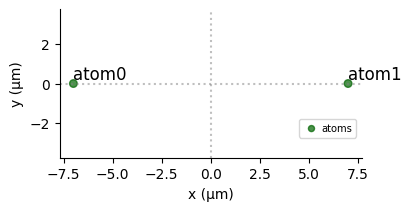

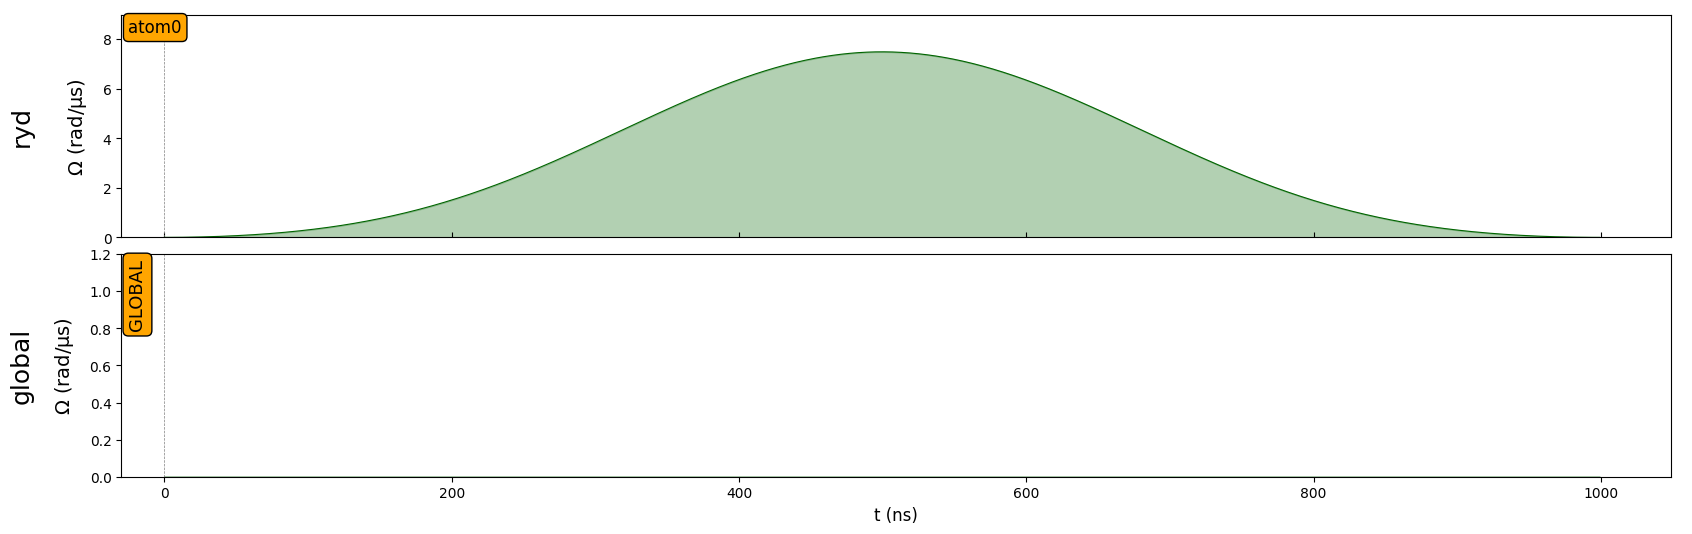

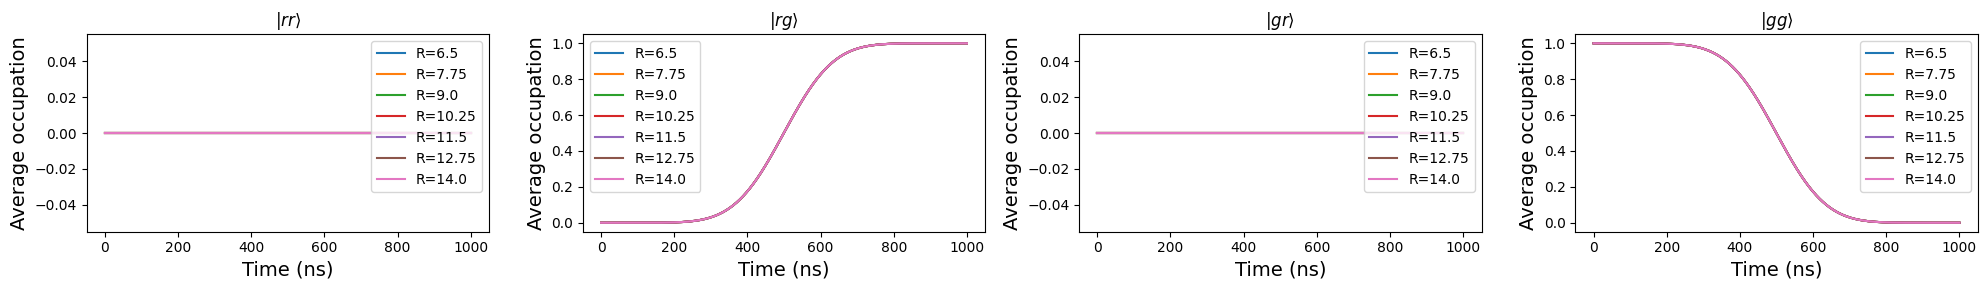

In [ ]:
# local pi pulse
data_rr = []
data_rg = []
data_gr = []
data_gg = []
distances = np.linspace(6.5, 14, 7)

r = [1, 0]  # |r>, |g> = [0, 1]. In pulser we use the convention that [1, 0] is the excited state
g = [0, 1]
rr = np.kron(r, r)  # |rr>
rg = np.kron(r, g)  # |rg>
gr = np.kron(g, r)  # |gr>
gg = np.kron(g, g)  # |gg>
occup_rr = [np.outer(rr, np.conj(rr))]  # |rr><rr|
occup_rg = [np.outer(rg, np.conj(rg))]  # |rg><rg|
occup_gr = [np.outer(gr, np.conj(gr))]  # |gr><gr|
occup_gg = [np.outer(gg, np.conj(gg))]  # |gg><gg|

for i, R in enumerate(distances):
  reg = Register.rectangle(1, 2, spacing=R, prefix="atom")

  # Pulse Sequence
  seq = Sequence(reg, DigitalAnalogDevice)
  seq.declare_channel("ryd", "rydberg_local", "atom0")
  seq.declare_channel("global", "rydberg_global")
#   seq.add(pi_pulse, "global") #, protocol="no-delay")
  seq.add(pi_pulse, "ryd")
  # seq.target("atom1", "ryd")
  # seq.add(pi_pulse, "ryd")
  # seq.add(pi_pulse, "global", protocol="no-delay")

  sim = QutipEmulator.from_sequence(seq)

  res = sim.run() # Returns a SimulationResults instance
  data_rr.append(
    res.expect(occup_rr)[0]
  ) # Get expectation value for the occupation operator

  data_rg.append(
    res.expect(occup_rg)[0]
  ) # Get expectation value for the occupation operator |rg>
  
  data_gr.append(
    res.expect(occup_gr)[0]
  ) # Get expectation value for the occupation operator |gr>
  data_gg.append(
    res.expect(occup_gg)[0]
  ) # Get expectation value for the occupation operator |gg>
print("...Simulation Complete!")

reg.draw()
seq.draw()

fig, ax = plt.subplots(1, 4, figsize=(20, 3))
plt.sca(ax[0])
for i, R in enumerate(distances):
  plt.plot(data_rr[i], label=f"R={R}")
  plt.xlabel("Time (ns)", fontsize=14)
  plt.ylabel(r"Average occupation", fontsize=14)
  plt.title(r"$|rr\rangle$")
  plt.legend()

plt.sca(ax[1])
for i, R in enumerate(distances):
  plt.plot(data_rg[i], label=f"R={R}")
  plt.xlabel("Time (ns)", fontsize=14)
  plt.ylabel(r"Average occupation", fontsize=14)
  plt.title(r"$|rg\rangle$")
  plt.legend()

plt.sca(ax[2])
for i, R in enumerate(distances):
  plt.plot(data_gr[i], label=f"R={R}")
  plt.xlabel("Time (ns)", fontsize=14)
  plt.ylabel(r"Average occupation", fontsize=14)
  plt.title(r"$|gr\rangle$")
  plt.legend()
# numerical error, but interesting that it looks like this

plt.sca(ax[3])
for i, R in enumerate(distances):
  plt.plot(data_gg[i], label=f"R={R}")
  plt.xlabel("Time (ns)", fontsize=14)
  plt.ylabel(r"Average occupation", fontsize=14)
  plt.title(r"$|gg\rangle$")
  plt.legend()
plt.tight_layout()
# interesting that all distances fall off with the exact same rate

# asymmetry between |rg> and |gr> because we first hit atom 0 and then atom 1

...Simulation Complete!


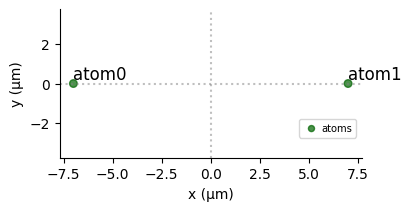

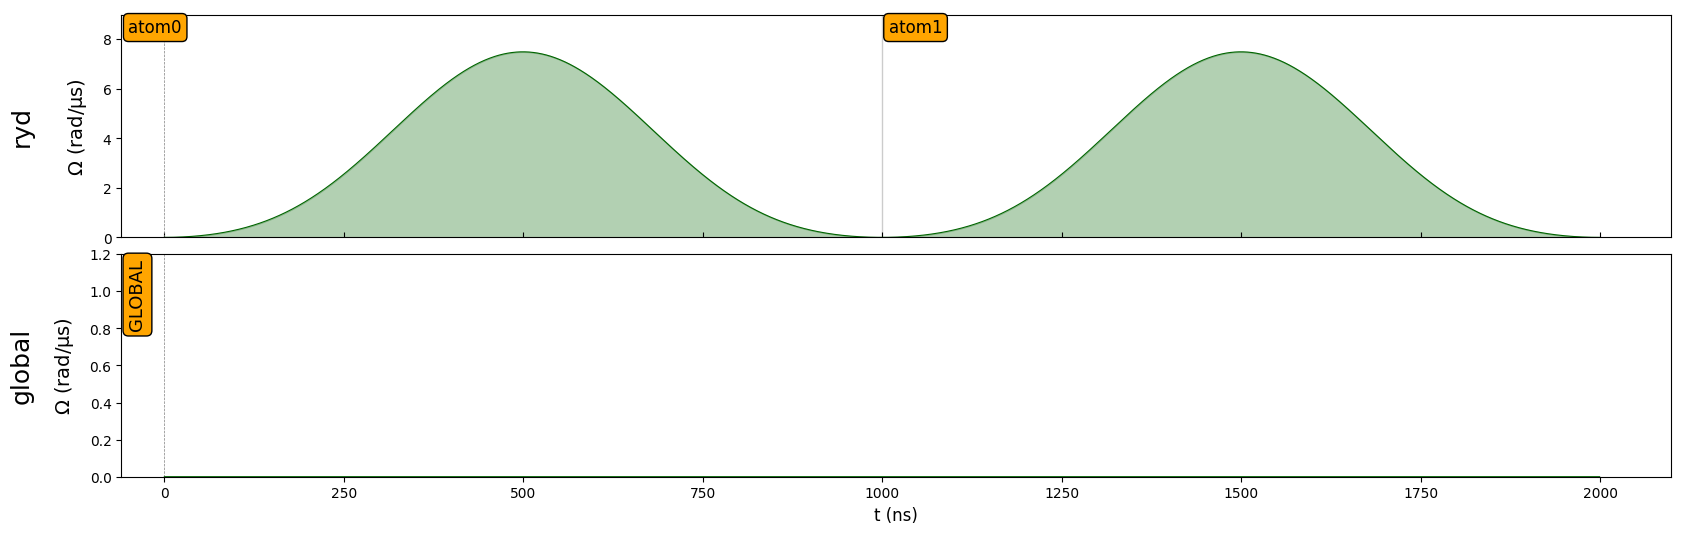

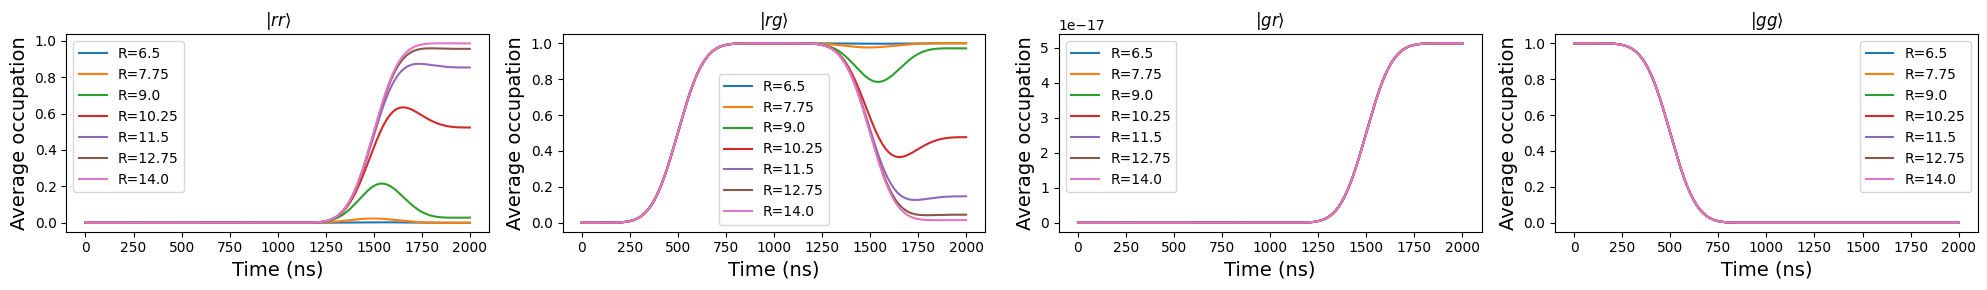

In [23]:
# pi pulse on atom 0 and then on atom 1
data_rr = []
data_rg = []
data_gr = []
data_gg = []
distances = np.linspace(6.5, 14, 7)

r = [1, 0]  # |r>, |g> = [0, 1]. In pulser we use the convention that [1, 0] is the excited state
g = [0, 1]
rr = np.kron(r, r)  # |rr>
rg = np.kron(r, g)  # |rg>
gr = np.kron(g, r)  # |gr>
gg = np.kron(g, g)  # |gg>
occup_rr = [np.outer(rr, np.conj(rr))]  # |rr><rr|
occup_rg = [np.outer(rg, np.conj(rg))]  # |rg><rg|
occup_gr = [np.outer(gr, np.conj(gr))]  # |gr><gr|
occup_gg = [np.outer(gg, np.conj(gg))]  # |gg><gg|

for i, R in enumerate(distances):
  reg = Register.rectangle(1, 2, spacing=R, prefix="atom")

  # Pulse Sequence
  seq = Sequence(reg, DigitalAnalogDevice)
  seq.declare_channel("ryd", "rydberg_local", "atom0")
  seq.declare_channel("global", "rydberg_global")
#   seq.add(pi_pulse, "global") #, protocol="no-delay")
  seq.add(pi_pulse, "ryd")
  seq.target("atom1", "ryd")
  seq.add(pi_pulse, "ryd")
  # seq.add(pi_pulse, "global", protocol="no-delay")

  sim = QutipEmulator.from_sequence(seq)

  res = sim.run() # Returns a SimulationResults instance
  data_rr.append(
    res.expect(occup_rr)[0]
  ) # Get expectation value for the occupation operator

  data_rg.append(
    res.expect(occup_rg)[0]
  ) # Get expectation value for the occupation operator |rg>
  
  data_gr.append(
    res.expect(occup_gr)[0]
  ) # Get expectation value for the occupation operator |gr>
  data_gg.append(
    res.expect(occup_gg)[0]
  ) # Get expectation value for the occupation operator |gg>
print("...Simulation Complete!")

reg.draw()
seq.draw()

fig, ax = plt.subplots(1, 4, figsize=(20, 3))
plt.sca(ax[0])
for i, R in enumerate(distances):
  plt.plot(data_rr[i], label=f"R={R}")
  plt.xlabel("Time (ns)", fontsize=14)
  plt.ylabel(r"Average occupation", fontsize=14)
  plt.title(r"$|rr\rangle$")
  plt.legend()

plt.sca(ax[1])
for i, R in enumerate(distances):
  plt.plot(data_rg[i], label=f"R={R}")
  plt.xlabel("Time (ns)", fontsize=14)
  plt.ylabel(r"Average occupation", fontsize=14)
  plt.title(r"$|rg\rangle$")
  plt.legend()

plt.sca(ax[2])
for i, R in enumerate(distances):
  plt.plot(data_gr[i], label=f"R={R}")
  plt.xlabel("Time (ns)", fontsize=14)
  plt.ylabel(r"Average occupation", fontsize=14)
  plt.title(r"$|gr\rangle$")
  plt.legend()
# numerical error, but interesting that it looks like this

plt.sca(ax[3])
for i, R in enumerate(distances):
  plt.plot(data_gg[i], label=f"R={R}")
  plt.xlabel("Time (ns)", fontsize=14)
  plt.ylabel(r"Average occupation", fontsize=14)
  plt.title(r"$|gg\rangle$")
  plt.legend()
plt.tight_layout()
# interesting that all distances fall off with the exact same rate

# asymmetry between |rg> and |gr> because we first hit atom 0 and then atom 1

...Simulation Complete!


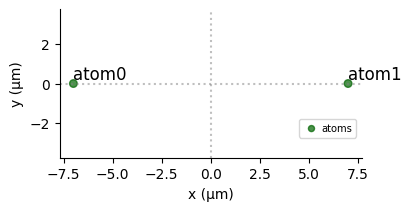

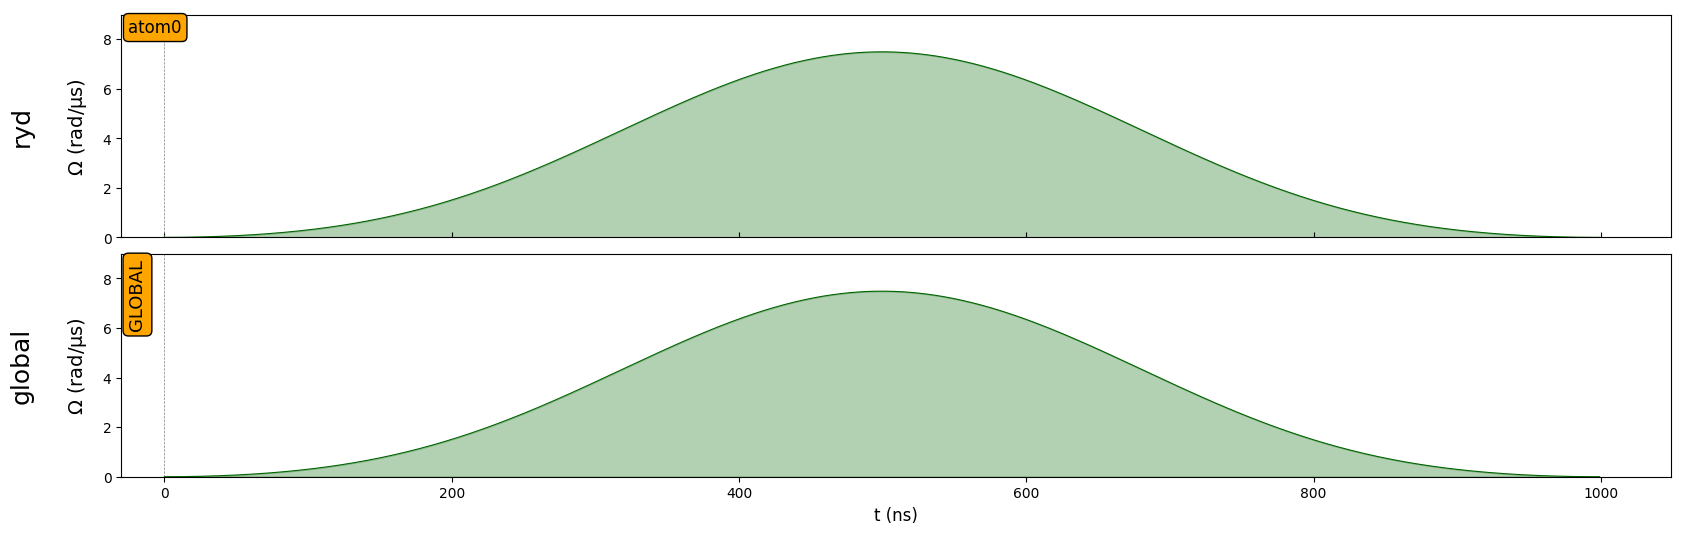

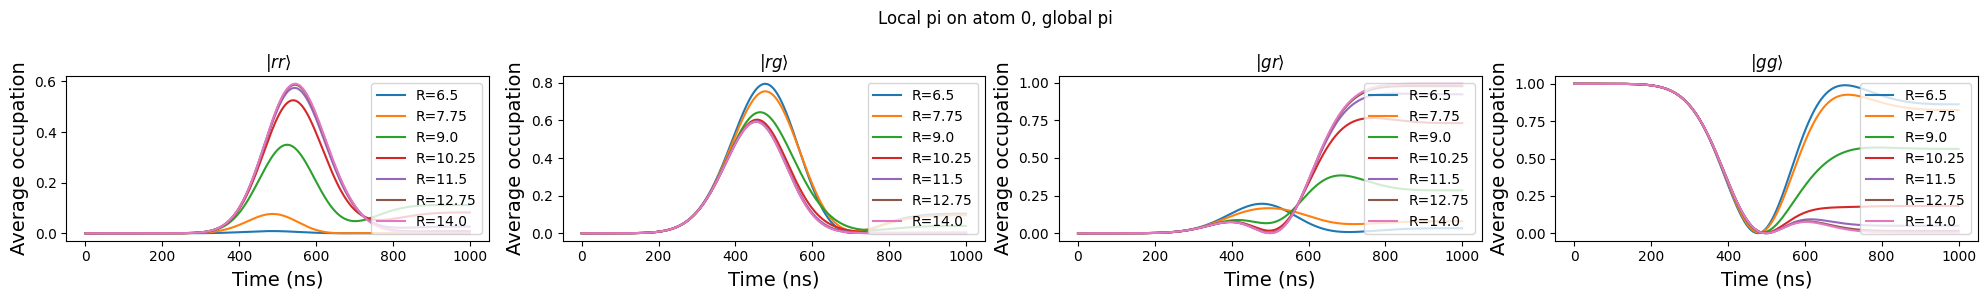

In [25]:
data_rr = []
data_rg = []
data_gr = []
data_gg = []
distances = np.linspace(6.5, 14, 7)

r = [1, 0]  # |r>, |g> = [0, 1]. In pulser we use the convention that [1, 0] is the excited state
g = [0, 1]
rr = np.kron(r, r)  # |rr>
rg = np.kron(r, g)  # |rg>
gr = np.kron(g, r)  # |gr>
gg = np.kron(g, g)  # |gg>
occup_rr = [np.outer(rr, np.conj(rr))]  # |rr><rr|
occup_rg = [np.outer(rg, np.conj(rg))]  # |rg><rg|
occup_gr = [np.outer(gr, np.conj(gr))]  # |gr><gr|
occup_gg = [np.outer(gg, np.conj(gg))]  # |gg><gg|

for i, R in enumerate(distances):
  reg = Register.rectangle(1, 2, spacing=R, prefix="atom")

  # Pulse Sequence
  seq = Sequence(reg, DigitalAnalogDevice)
  seq.declare_channel("ryd", "rydberg_local", "atom0")
  seq.declare_channel("global", "rydberg_global")
  seq.add(pi_pulse, "global") #, protocol="no-delay")
  seq.add(pi_pulse, "ryd", protocol="no-delay")
#   seq.target("atom1", "ryd")
#   seq.add(pi_pulse, "ryd")
  # seq.add(pi_pulse, "global", protocol="no-delay")

  sim = QutipEmulator.from_sequence(seq)

  res = sim.run() # Returns a SimulationResults instance
  data_rr.append(
    res.expect(occup_rr)[0]
  ) # Get expectation value for the occupation operator

  data_rg.append(
    res.expect(occup_rg)[0]
  ) # Get expectation value for the occupation operator |rg>
  
  data_gr.append(
    res.expect(occup_gr)[0]
  ) # Get expectation value for the occupation operator |gr>
  data_gg.append(
    res.expect(occup_gg)[0]
  ) # Get expectation value for the occupation operator |gg>
print("...Simulation Complete!")

reg.draw()
seq.draw()

fig, ax = plt.subplots(1, 4, figsize=(20, 3))
plt.sca(ax[0])
for i, R in enumerate(distances):
  plt.plot(data_rr[i], label=f"R={R}")
  plt.xlabel("Time (ns)", fontsize=14)
  plt.ylabel(r"Average occupation", fontsize=14)
  plt.title(r"$|rr\rangle$")
  plt.legend()

plt.sca(ax[1])
for i, R in enumerate(distances):
  plt.plot(data_rg[i], label=f"R={R}")
  plt.xlabel("Time (ns)", fontsize=14)
  plt.ylabel(r"Average occupation", fontsize=14)
  plt.title(r"$|rg\rangle$")
  plt.legend()

plt.sca(ax[2])
for i, R in enumerate(distances):
  plt.plot(data_gr[i], label=f"R={R}")
  plt.xlabel("Time (ns)", fontsize=14)
  plt.ylabel(r"Average occupation", fontsize=14)
  plt.title(r"$|gr\rangle$")
  plt.legend()
# numerical error, but interesting that it looks like this

plt.sca(ax[3])
for i, R in enumerate(distances):
  plt.plot(data_gg[i], label=f"R={R}")
  plt.xlabel("Time (ns)", fontsize=14)
  plt.ylabel(r"Average occupation", fontsize=14)
  plt.title(r"$|gg\rangle$")
  plt.legend()
plt.suptitle("Local pi on atom 0, global pi")
plt.tight_layout()
# interesting that all distances fall off with the exact same rate

# asymmetry between |rg> and |gr> because we first hit atom 0 and then atom 1